In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CADASTRO_IES_2020.CSV', encoding='ISO-8859-1', sep=';', low_memory=False)

In [16]:
print("Análise exploratória:")
print("Total de linhas:", len(df))
print("\nResumo estatístico:")
print(df.describe())
print("\nQuantidade de valores NaN por coluna:")
print(df.isna().sum())

Análise exploratória:
Total de linhas: 2457

Resumo estatístico:
       NU_ANO_CENSO  CO_REGIAO_IES    CO_UF_IES  CO_MUNICIPIO_IES  \
count        2457.0    2457.000000  2457.000000      2.457000e+03   
mean         2020.0       2.994709    33.476190      3.365560e+06   
std             0.0       1.052941     9.622577      9.629679e+05   
min          2020.0       1.000000    11.000000      1.100023e+06   
25%          2020.0       2.000000    29.000000      2.909208e+06   
50%          2020.0       3.000000    33.000000      3.306305e+06   
75%          2020.0       4.000000    41.000000      4.106407e+06   
max          2020.0       5.000000    53.000000      5.300108e+06   

       IN_CAPITAL_IES  CO_MESORREGIAO_IES  CO_MICRORREGIAO_IES  \
count     2457.000000         2457.000000          2457.000000   
mean         0.348392            5.836793            23.398860   
std          0.476558            4.304170            18.938151   
min          0.000000            1.000000        

In [17]:
df.dropna(inplace=True)

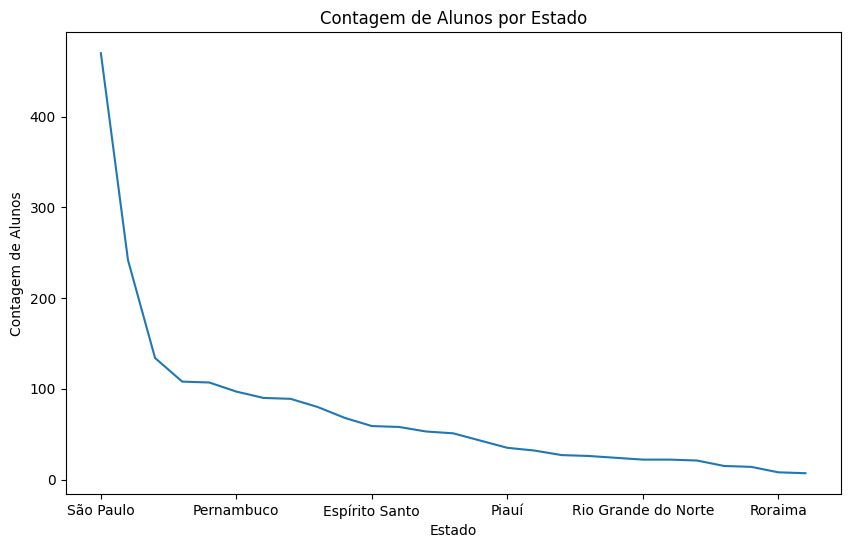

In [18]:
state_counts = df['NO_UF_IES'].value_counts()
state_counts.plot(kind='line', title='Contagem de Alunos por Estado', figsize=(10, 6))
plt.xlabel('Estado')
plt.ylabel('Contagem de Alunos')
plt.show()